In [5]:
import pandas as pd
import numpy as np
# Load the Iris dataset directly from a URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

# Display the first 5 rows
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["species"] = encoder.fit_transform(df["species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
new_df = df[df['species'] != 0][['sepal_length','petal_length','species']]
new_df.head()

,sepal_length,petal_length,species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


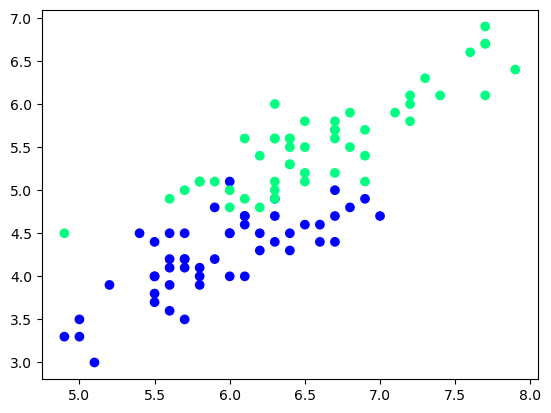

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(new_df['sepal_length'],new_df['petal_length'],c=new_df['species'],cmap='winter')

In [19]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal_length,sepal_width,petal_length,petal_width,species
55,5.7,2.8,4.5,1.3,1
31,5.4,3.4,1.5,0.4,0
3,4.6,3.1,1.5,0.2,0
46,5.1,3.8,1.6,0.2,0
48,5.3,3.7,1.5,0.2,0
40,5.0,3.5,1.3,0.3,0
29,4.7,3.2,1.6,0.2,0
51,6.4,3.2,4.5,1.5,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [20]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [ ]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [21]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [22]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_length,sepal_width,petal_length,petal_width,species
129,7.2,3.0,5.8,1.6,2
147,6.5,3.0,5.2,2.0,2
129,7.2,3.0,5.8,1.6,2
108,6.7,2.5,5.8,1.8,2
129,7.2,3.0,5.8,1.6,2
75,6.6,3.0,4.4,1.4,1
147,6.5,3.0,5.2,2.0,2
36,5.5,3.5,1.3,0.2,0


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [24]:
dt_bag1 = DecisionTreeClassifier()

In [25]:
evaluate(dt_bag1,X,y)

NameError: name 'evaluate' is not defined

In [30]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.81
rf 0.73
knn 0.76


In [31]:
from sklearn.ensemble import VotingClassifier

In [32]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


In [33]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.78


In [34]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))

for i=1,j=1,k=1 0.77
for i=1,j=1,k=2 0.77
for i=1,j=1,k=3 0.75
for i=1,j=2,k=1 0.75
for i=1,j=2,k=2 0.76
for i=1,j=2,k=3 0.76
for i=1,j=3,k=1 0.74
for i=1,j=3,k=2 0.75
for i=1,j=3,k=3 0.76
for i=2,j=1,k=1 0.77
for i=2,j=1,k=2 0.77
for i=2,j=1,k=3 0.77
for i=2,j=2,k=1 0.77
for i=2,j=2,k=2 0.77
for i=2,j=2,k=3 0.77
for i=2,j=3,k=1 0.75
for i=2,j=3,k=2 0.76
for i=2,j=3,k=3 0.77
for i=3,j=1,k=1 0.79
for i=3,j=1,k=2 0.78
for i=3,j=1,k=3 0.79
for i=3,j=2,k=1 0.77
for i=3,j=2,k=2 0.77
for i=3,j=2,k=3 0.76
for i=3,j=3,k=1 0.77
for i=3,j=3,k=2 0.77
for i=3,j=3,k=3 0.77


In [35]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86
